# Predicting Customer Lifetime Value(CLV)

In [189]:
import pandas as pd             #importing libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [190]:
cust_df = pd.read_csv('Customer-Value-Analysis.csv')  #loading dataset into pandas dataframe
cust_df.shape

(9134, 24)

In [191]:
cust_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [192]:
cust_df.dtypes  #understanding the datatypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [193]:
cust_df.isnull().sum()  #nullcheck

Customer                         0
State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
Effective To Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy Type                      0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
dtype: int64

#  Changing Response attribute to 0's and 1's

In [194]:
cust_df.Response = cust_df.Response.apply(lambda X : 0 if X == 'No' else 1)  
#cust_df.head()

# Finding correlation between columns

In [195]:
cust_df.corr()

,Customer Lifetime Value,Response,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
Customer Lifetime Value,1.000000,-0.008930,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451
Response,-0.008930,1.000000,0.011932,0.010966,-0.016597,0.002952,-0.009881,-0.020891,0.016877
Income,0.024366,0.011932,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254
Monthly Premium Auto,0.396262,0.010966,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017
Months Since Last Claim,0.011517,-0.016597,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563
Months Since Policy Inception,0.009418,0.002952,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335
Number of Open Complaints,-0.036343,-0.009881,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241
Number of Policies,0.021955,-0.020891,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354
Total Claim Amount,0.226451,0.016877,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000


In [196]:
corr_matrix = cust_df.corr()['Customer Lifetime Value']    #sorting correlation values in descending order
sorted_corr = corr_matrix.sort_values(ascending = False)
sorted_corr

Customer Lifetime Value          1.000000
Monthly Premium Auto             0.396262
Total Claim Amount               0.226451
Income                           0.024366
Number of Policies               0.021955
Months Since Last Claim          0.011517
Months Since Policy Inception    0.009418
Response                        -0.008930
Number of Open Complaints       -0.036343
Name: Customer Lifetime Value, dtype: float64

Also we can visualize this using heat map

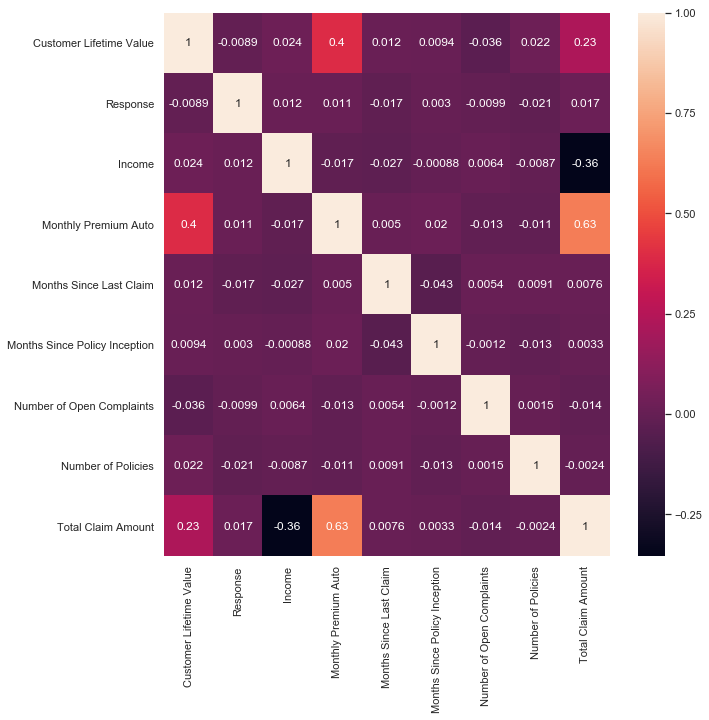

In [197]:
sns.set(rc={'figure.figsize':(10,10)})  #heatmap
sns.heatmap(cust_df.corr(),annot = True)

As we can see that the monthly premium auto, total claim amount, and income has an effect on customer lifetime value attribute. Let's work on these attributes

# Outliers check

The meadian is:  33889.5


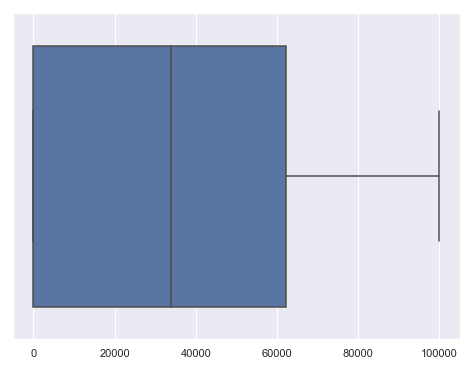

In [198]:
sns.set(rc={'figure.figsize':(8,6)})   
x = cust_df['Income'].values
ax = sns.boxplot(x)
print('The meadian is: ', cust_df['Income'].median())

The meadian is:  83.0


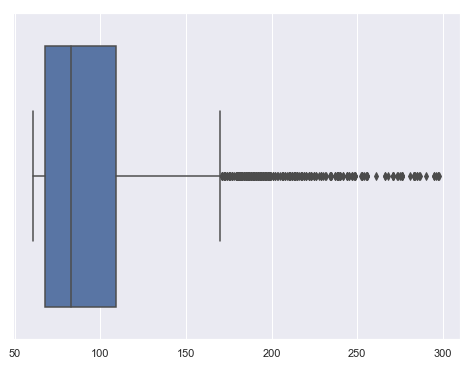

In [199]:
sns.set(rc={'figure.figsize':(8,6)})
x = cust_df['Monthly Premium Auto'].values
ax = sns.boxplot(x)
print('The meadian is: ', cust_df['Monthly Premium Auto'].median())

The meadian is:  383.94543350000004


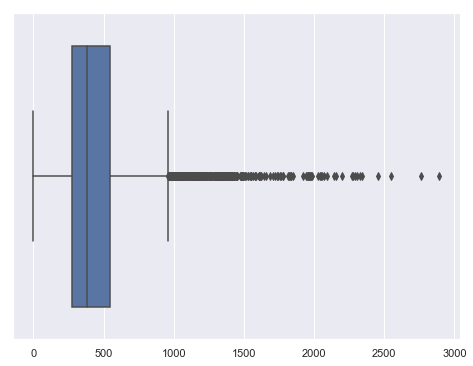

In [200]:
sns.set(rc={'figure.figsize':(8,6)})
x = cust_df['Total Claim Amount'].values
ax = sns.boxplot(x)
print('The meadian is: ', cust_df['Total Claim Amount'].median())

With results above, we can say that there are outliers in total claim amount and monthly premium auto.Usually we remove the outliers but as this data is related to insurance company, the outliers can be our most important customers. So, removing the outliers is not needed.

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


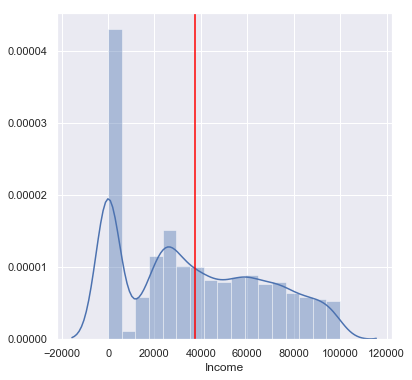

In [201]:
#normal distributions
sns.set(rc = {'figure.figsize': (6,6)})
sns.distplot(cust_df['Income'])
mean = cust_df['Income'].mean()
plt.axvline(mean,0,1,color = 'red')

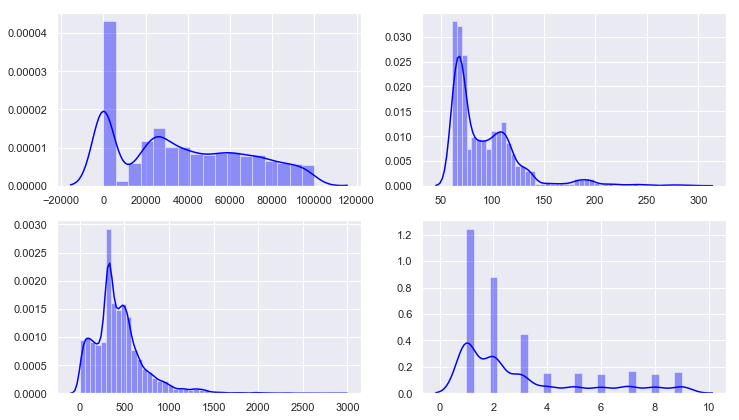

In [202]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))

a = cust_df['Income'].values
b = cust_df['Monthly Premium Auto'].values
c = cust_df['Total Claim Amount'].values
d = cust_df['Number of Policies'].values


# plot 1
sns.distplot(a, color = 'blue', ax=axes[0,0])

# plot 2
sns.distplot(b, color = 'blue', ax=axes[0,1])

# plot 3
sns.distplot(c, color = 'blue', ax=axes[1,0])

#plot 4
sns.distplot(d, color = 'blue', ax=axes[1,1])

As the columns are skewed, let's try normalizing it by appying transformations such as square

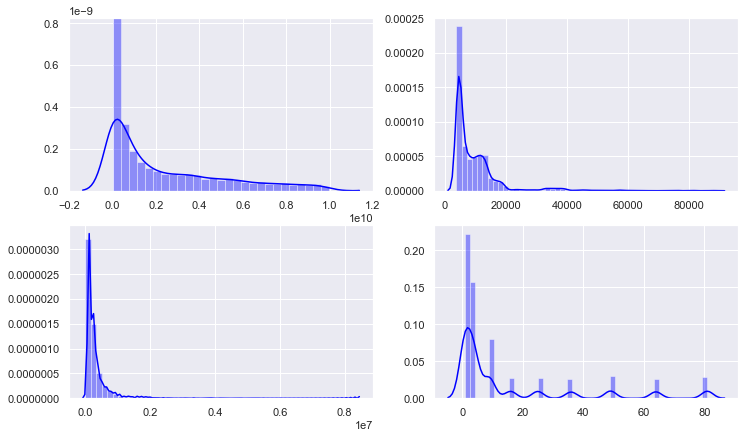

In [203]:
fig, axes = plt.subplots(2, 2, figsize=(12, 7))
at = (cust_df['Income']**2).values
bt = (cust_df['Monthly Premium Auto']**2).values
ct = (cust_df['Total Claim Amount']**2).values
dt = (cust_df['Number of Policies']**2).values

# plot 1
sns.distplot(at, color = 'blue', ax=axes[0,0])

# plot 2
sns.distplot(bt, color = 'blue', ax=axes[0,1])

# plot 3
sns.distplot(ct, color = 'blue', ax=axes[1,0])

# plot 4
sns.distplot(dt, color = 'blue', ax=axes[1,1])


With the transformation of the columns, our data is getting much skewed or the peaks of the distribution are increasing. So, it is better to remain with our original data

# visualizations

As it is important for the business to understand their customers behavior. some key points can be drawn if we observe the trends in response attribute w.r.t other columns. (Tableau)


Analysis on customer life time value( categorical variables)

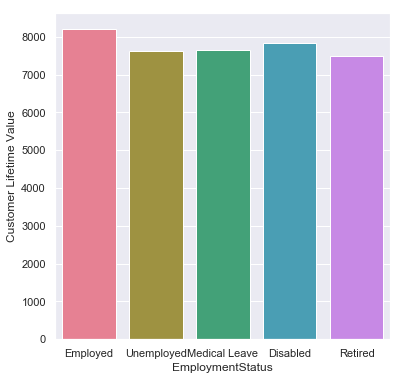

In [204]:
# How is customer lifetime value related to employment status of thr customer
ax = sns.barplot(y='Customer Lifetime Value', x='EmploymentStatus',data = cust_df, ci = False, palette = 'husl')


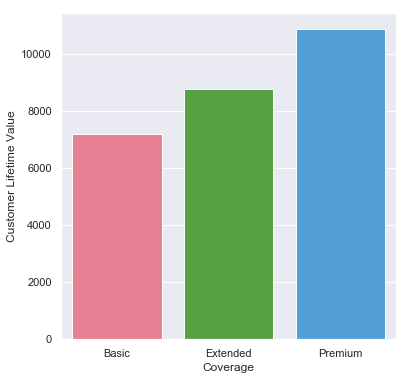

In [205]:
#CLV w.r.t coverage
ax = sns.barplot(y='Customer Lifetime Value', x='Coverage',data = cust_df, ci = False, palette = 'husl')


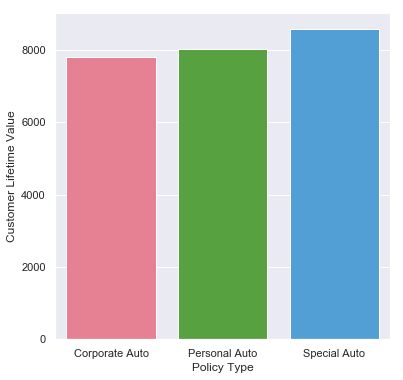

In [206]:
#CLV w.r.t policy type
ax = sns.barplot(y='Customer Lifetime Value', x='Policy Type',data = cust_df, ci = False, palette = 'husl')


As there is no much variaion in CLV w.r.t whether a customer is employed or not, we can disregard this column.

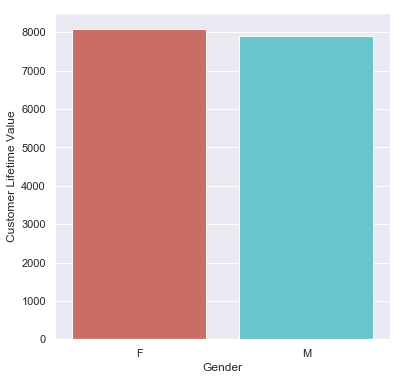

In [207]:
#CLV w.r.t gender
bx = sns.barplot(y='Customer Lifetime Value', x='Gender',data = cust_df, ci = False, palette ='hls')

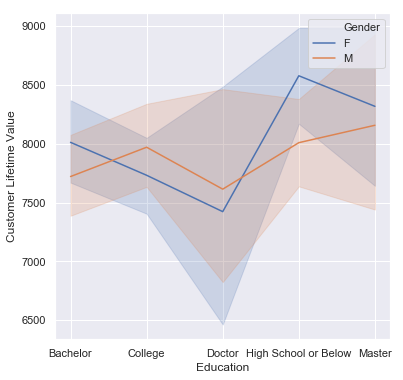

In [208]:
#CLV w.r.t Education and Gender
ax = sns.lineplot(y='Customer Lifetime Value', x='Education',hue = 'Gender',data = cust_df)

We can say that people who are educated(doctor) have much less customer lifetime value, when compared to the people who studied high school or below. And also, CLV is slightly high in case of females, than males.

In [209]:
rough = cust_df.drop(['State','Customer','Response','EmploymentStatus','Gender','Location Code','Vehicle Size','Policy','Policy Type','Sales Channel','Income','Effective To Date','Education'],axis=1,inplace = True)
#cust_df.columns

In [210]:
rough_cat = cust_df.select_dtypes(include = ['object']).columns
rough_cat

Index(['Coverage', 'Marital Status', 'Renew Offer Type', 'Vehicle Class'], dtype='object')

In [211]:
cols = ['Coverage', 'Marital Status', 'Renew Offer Type', 'Vehicle Class'] #dummy encoding of the categorical data
new = pd.get_dummies(cust_df,columns=['Coverage','Marital Status','Number of Policies','Renew Offer Type','Vehicle Class'],drop_first=True)

In [212]:
new.dtypes

Customer Lifetime Value          float64
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Total Claim Amount               float64
Coverage_Extended                  uint8
Coverage_Premium                   uint8
Marital Status_Married             uint8
Marital Status_Single              uint8
Number of Policies_2               uint8
Number of Policies_3               uint8
Number of Policies_4               uint8
Number of Policies_5               uint8
Number of Policies_6               uint8
Number of Policies_7               uint8
Number of Policies_8               uint8
Number of Policies_9               uint8
Renew Offer Type_Offer2            uint8
Renew Offer Type_Offer3            uint8
Renew Offer Type_Offer4            uint8
Vehicle Class_Luxury Car           uint8
Vehicle Class_Luxury SUV           uint8
Vehicle Class_SUV                  uint8
Vehicle Class_Sp

In [213]:
new.head()

,Customer Lifetime Value,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Total Claim Amount,Coverage_Extended,Coverage_Premium,Marital Status_Married,Marital Status_Single,...,Number of Policies_8,Number of Policies_9,Renew Offer Type_Offer2,Renew Offer Type_Offer3,Renew Offer Type_Offer4,Vehicle Class_Luxury Car,Vehicle Class_Luxury SUV,Vehicle Class_SUV,Vehicle Class_Sports Car,Vehicle Class_Two-Door Car
0,2763.519279,69,32,5,0,384.811147,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,6979.535903,94,13,42,0,1131.464935,1,0,0,1,...,1,0,0,1,0,0,0,0,0,0
2,12887.431650,108,18,38,0,566.472247,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,7645.861827,106,18,65,0,529.881344,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2813.692575,73,12,44,0,138.130879,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


# Model Selection

In [214]:
X = new.drop(['Customer Lifetime Value'],axis = 1)  
#X.head()
y = new[['Customer Lifetime Value']]
#print(y)

In [215]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [219]:
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(regressor.score(X_test, y_test))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

0.6335667047027755
R2 score = 0.63


In [217]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth = 5,random_state=1)
regr_1.fit(X_train, y_train)
ypred_dt = regr_1.predict(X_test)
print(regr_1.score(X_test, y_test))
print("R2 score =", round(sm.r2_score(y_test, ypred_dt), 2))

0.6177902611729776
R2 score = 0.62
